# Assignment 1 - Wine Quality (UCI) - Classification

**Student:** Justus Izuchukwu Onuh  
**Institution:** Ho Chi Minh City University of Technology  
**Course:** Programming Platform for Data Analysis and Visualization (CO5177)  
**Lecturer:** LE THANH SACH  


---

### Objective 
Perform **Exploratory Data Analysis (EDA)** and apply a **classification** model to the UCI Red Wine Quality dataset.  
Everything (code, plots, explanations, and results) will be contained in this notebook.


### Tasks 
1. Load and explore the dataset  
2. Perform comprehensive EDA with visualizations  
3. Apply a **classification** model (predict `quality_label`) 
4. Evaluate model performance with classification metrics  
5. Present findings and explanations clearly using Markdown and code cells


In [5]:
# Step 1: Setup — imports and download dataset
from pathlib import Path 
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sns.set(style="whitegrid")
DATA_DIR = Path("data")
DATA_DIR.mkdir(exist_ok=True)

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
DATA_PATH = DATA_DIR / "winequality-red.csv"

if not DATA_PATH.exists():
    print("Downloading dataset from UCI repository...")
    urllib.request.urlretrieve(URL, DATA_PATH)
    print("Download complete:", DATA_PATH)
else:
    print("Dataset already present at:", DATA_PATH)

print("Notebook kernel Python:", sys.executable)


Dataset already present at: data/winequality-red.csv
Notebook kernel Python: /opt/homebrew/opt/python@3.11/bin/python3.11


### Dataset description

- **Source:** UCI Machine Learning Repository (Wine Quality — Red)  
- **Samples:** 1599 red wine observations  
- **Features (11 numeric):** fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol  
- **Original target:** `quality` (integer score, usually 3–8)

**Modeling decision (classification):**  
We will convert `quality` to a binary label `quality_label` where:
- `quality_label = 1` (good) if `quality >= 7`  
- `quality_label = 0` (not good) if `quality < 7`

This threshold is chosen to separate higher-quality wines from the rest; it is a common and interpretable split for classification tasks. We will justify and briefly discuss this choice in the notebook results.


In [ ]:
# Load the dataset (semicolon separator)
df = pd.read_csv(DATA_PATH, sep=';')

# Basic confirmation
print("Dataset shape:", df.shape)  # Expecting (1599, 12) 

# Show column names
print("\nColumns:", df.columns.tolist())

# Data information (dtypes and non-null counts)
print("\n----- df.info() -----")
df.info()

# First five rows
print("\n----- First 5 rows -----")
display(df.head())

# Summary statistics
print("\n----- Summary statistics -----")
display(df.describe().T)

# Target distribution (original)
print("\n----- Original 'quality' value counts -----")
print(df['quality'].value_counts().sort_index())

# Create binary classification label: quality >= 7 => 1 (good), else 0
df['quality_label'] = (df['quality'] >= 7).astype(int)
print("\n----- Created 'quality_label' distribution -----")
print(df['quality_label'].value_counts())


Dataset shape: (1599, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

----- df.info() -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-nul

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



----- Summary statistics -----


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000



----- Original 'quality' value counts -----
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

----- Created 'quality_label' distribution -----
quality_label
0    1382
1     217
Name: count, dtype: int64


**Explanation:**

I loaded the UCI Red Wine dataset and verified it has 1599 samples and 12 original columns (11 features + `quality`).  
All features are numeric and there are no missing values (`df.info()` confirms this).  
For this assignment I will perform **classification**: I created `quality_label` where `quality >= 7` is considered 'good' (1) and the rest 'not good' (0).  
The next section will perform detailed EDA (distributions, boxplots, correlation) to justify feature choices before modeling.


# Step 2 - Exploratory Data Analysis (EDA)

The goal of this section is to understand:
- how each feature is distributed,
- how features relate to wine quality (`quality_label`),
- correlations between numeric variables,
- potential outliers or patterns that influence wine quality.


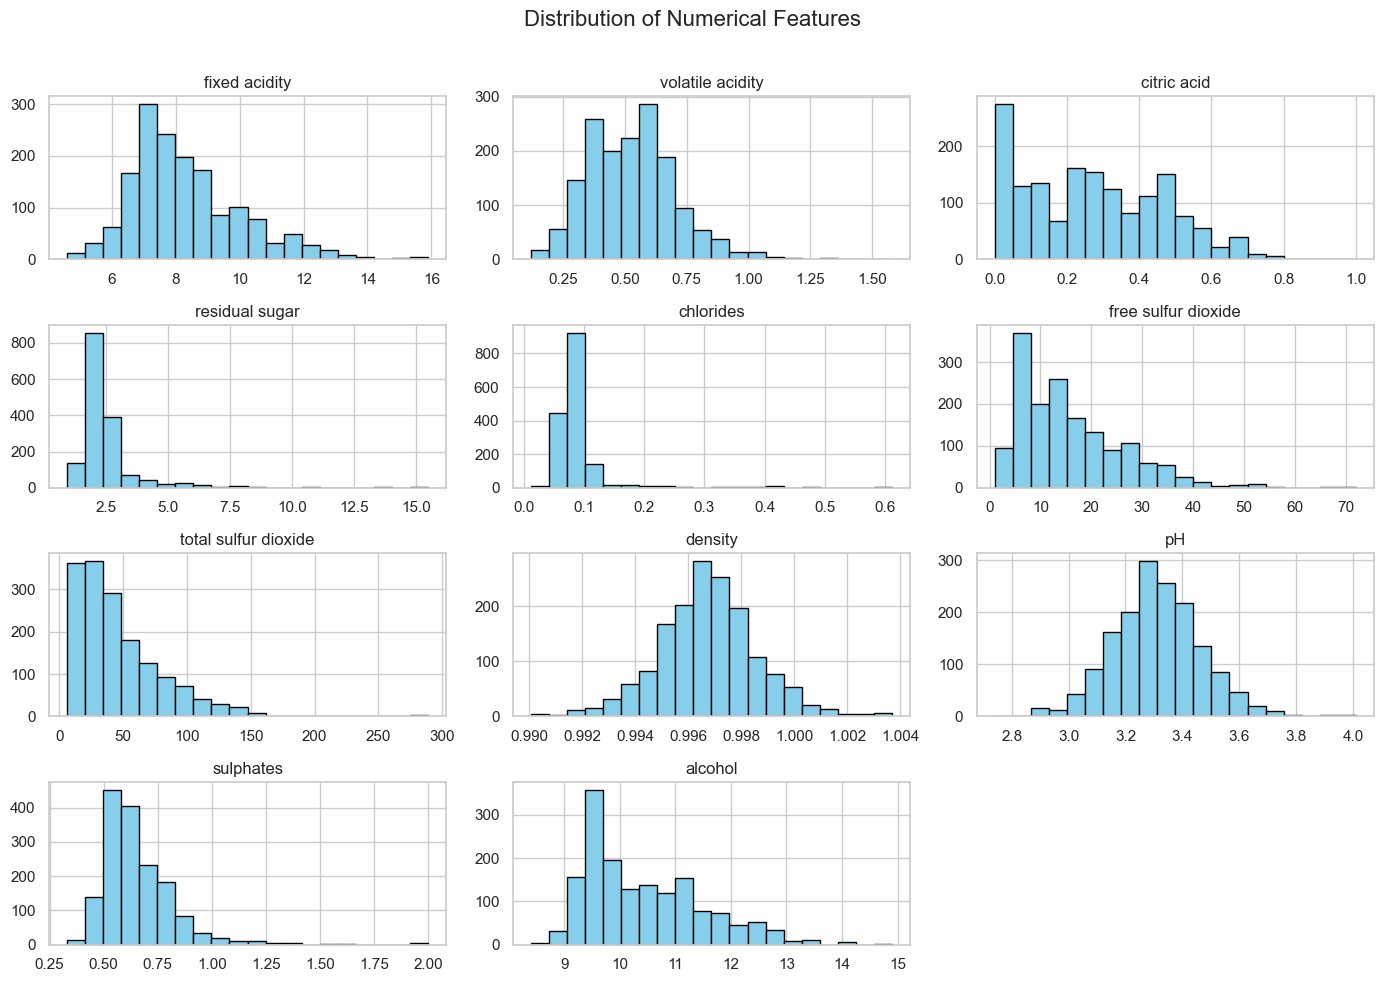

In [7]:
# Visualize distributions of all numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['quality', 'quality_label'])

df[num_cols].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
